Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


Bussiness/Social:
    to find the region and predict the average price 

Steps to Follow for the Project: The dataset contains 14 features and 16448 samples
Below are the steps to follow for the project:

Import the required libraries and data.
Do the careful EDA analysis, preprocessing and feature engineering on the given data.
Build/Test multiple models on the same dataset.
Check underfitting/overfitting,  avoid underfitting or overfitting (bias/variance) , cross validation and all performance parameters(metrics) for all models depending on the problem type.
Try to achieve a model with good performance.
Select the best/final performing model and explain on what basis you have selected the particular model as a final model.
Do hyper parameter tuning on the final/best model or on all models.
Save the best model for production and convey on which basis you have chosen that model.
Make the documentation and write your findings in the same file i.e. ipynb

# Task 1 : Predicting the Average Price for Avocado

# 1: Importing required Libraries and data

In [110]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings 
warnings.filterwarnings('ignore')
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
import joblib
from sklearn.model_selection import cross_validate,KFold,cross_val_score
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)

In [111]:
# Loading the dataset downloaded from kaggle
avocado_dt=pd.read_csv('avocado.csv')
avocado_dt.head(25)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
5,5.0,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015.0,Albany
6,6.0,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015.0,Albany
7,7.0,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015.0,Albany
8,8.0,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015.0,Albany
9,9.0,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015.0,Albany


In [112]:
avocado_dt.shape

(16468, 14)

# 2: Data Cleaning and Transfroming (Exploratory Data Analysis)

In [113]:
avocado_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


All are numeric except Date,type and region which have to be converted to numeric for proper prediction and analysis

In [114]:
# Checking for null values
avocado_dt.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

<AxesSubplot:>

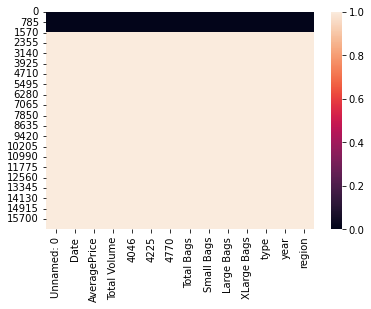

In [115]:
# The data is having very big null values that need to be replaced or removed 
# Using Heat map to check for null values, we can see over 14 951 null values
sns.heatmap(avocado_dt.isnull())

In [116]:
# dropping the null values
avocado_dt.dropna(inplace=True)


In [117]:
avocado_dt.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


Some of the observations from the statistical description are:
    There are no more missing values
    All features are numeric except Date,type and region which have to be converted to numeric for proper prediction and analysis
   

In [118]:
# Converting Date into Year, Month, day 

avocado_dt[['Date','Month','Year']] = avocado_dt['Date'].str.split("-",expand = True)
# splitting the date into year,month day using python split function

In [119]:
avocado_dt[['Date','Month','Year']]=avocado_dt[['Date','Month','Year']].astype(int)

In [120]:
# droping one column of year to avoid redundant data
avocado_dt.drop(['year','type'],axis=1, inplace=True)
avocado_dt.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Month,Year
0,0.0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany,12,2015
1,1.0,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany,12,2015
2,2.0,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany,12,2015
3,3.0,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany,12,2015
4,4.0,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany,11,2015


In [121]:
avocado_dt['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [122]:
reg = preprocessing.LabelEncoder()
avocado_dt['regions']=reg.fit_transform(avocado_dt['region'])

In [123]:
avocado_dt['regions'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [124]:
avocado_dt['regions']=avocado_dt['regions'].astype(int)

In [125]:
avocado_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   int32  
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  region        1517 non-null   object 
 12  Month         1517 non-null   int32  
 13  Year          1517 non-null   int32  
 14  regions       1517 non-null   int32  
dtypes: float64(10), int32(4), object(1)
memory usage: 165.9+ KB


In [126]:
avocado_dt.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Month,Year,regions
0,0.0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany,12,2015,0
1,1.0,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany,12,2015,0
2,2.0,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany,12,2015,0
3,3.0,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany,12,2015,0
4,4.0,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany,11,2015,0


In [127]:
# dropping region, Total bags, small bags, large bags and XLarge Bags bcos they are not relevant for prediction
avocado_dt.drop(['Unnamed: 0','Total Bags','Small Bags','Large Bags','XLarge Bags','region'],axis=1, inplace=True)
avocado_dt.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Month,Year,regions
0,27,1.33,64236.62,1036.74,54454.85,48.16,12,2015,0
1,20,1.35,54876.98,674.28,44638.81,58.33,12,2015,0
2,13,0.93,118220.22,794.70,109149.67,130.50,12,2015,0
3,6,1.08,78992.15,1132.00,71976.41,72.58,12,2015,0
4,29,1.28,51039.60,941.48,43838.39,75.78,11,2015,0


In [128]:
avocado_dt.describe() # After dropping unneccesary columns and null values

,Date,AveragePrice,Total Volume,4046,4225,4770,Month,Year,regions
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,15.449572,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,6.166777,2015.162821,21.196440
std,8.796714,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,3.391243,0.369324,16.132398
min,1.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,1.000000,2015.000000,0.000000
25%,8.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.000000,2015.000000,6.000000
50%,15.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,6.000000,2015.000000,19.000000
75%,22.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,9.000000,2015.000000,35.000000
max,31.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,12.000000,2016.000000,50.000000


# Univarite Analysis

In [129]:
# Determine the sales values for each year
yearly_val = avocado_dt["Year"].value_counts()
yearly_val

2015    1270
2016     247
Name: Year, dtype: int64

                          Yearly actual sold percentage                          


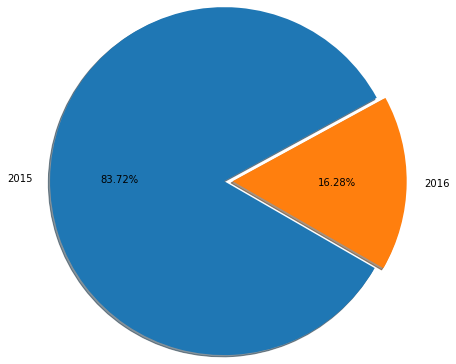

In [130]:
labels = ['2015','2016']
explode=np.zeros(len(labels))
explode[-1]=0.1
# Representing the pie chart using Pie Chart
print('\033[1mYearly actual sold percentage'.center(85))
plt.pie(avocado_dt['Year'].value_counts(), labels=labels, counterclock=False, shadow=True,explode=explode, autopct='%1.2f%%', radius=2, startangle=-30)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='count'>

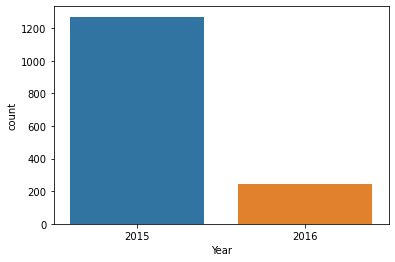

In [131]:
sns.countplot(x='Year',data=avocado_dt)

<AxesSubplot:xlabel='Month', ylabel='count'>

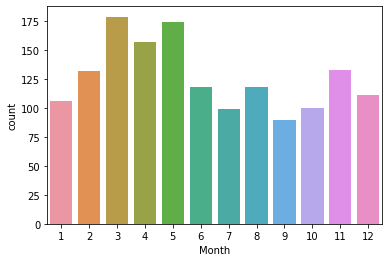

In [132]:
sns.countplot(x='Month',data=avocado_dt)

Summary from Univarite Analysis:
     We can see that maximum values is from Year 2015
     We can see maximum avocado are sold in month 3,4 and 5 months on average sale

# Bivarite Analysis

In [133]:
# function to Visualizing Categorical values using Scatter plot
def features_plot(Categorical_column):
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    col_name=['Date','Total Volume','4046','4225','4770','regions']
    sns.scatterplot(y=Categorical_column,x='AveragePrice', data=avocado_dt)
    plt.title(f"{Categorical_column.title()} vs AveragePrice",fontweight="black",size=25,pad=10,)
    #col_values = avocado_dt[Categorical_column].value_counts()
    plt.tight_layout()

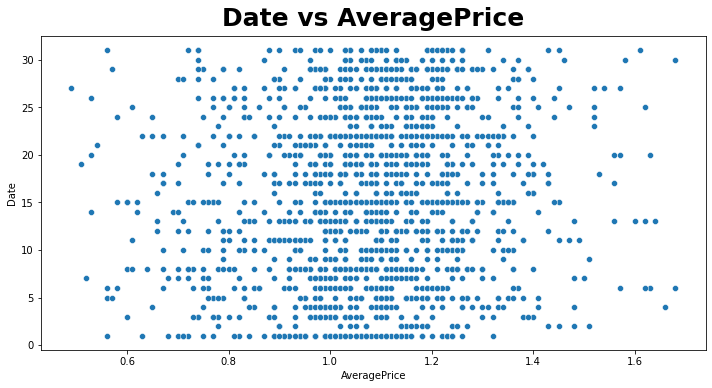

In [134]:
features_plot("Date") # 

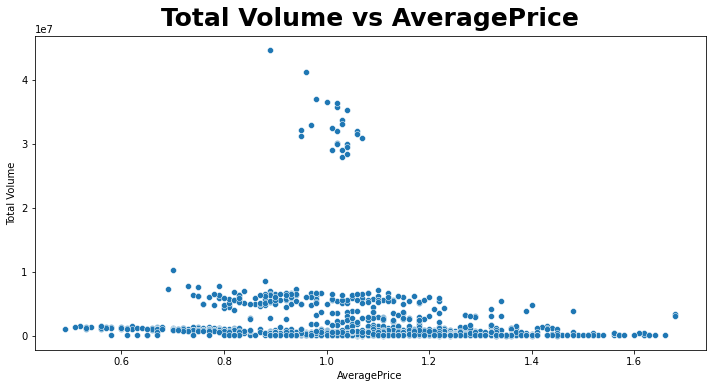

In [135]:
features_plot("Total Volume") # 

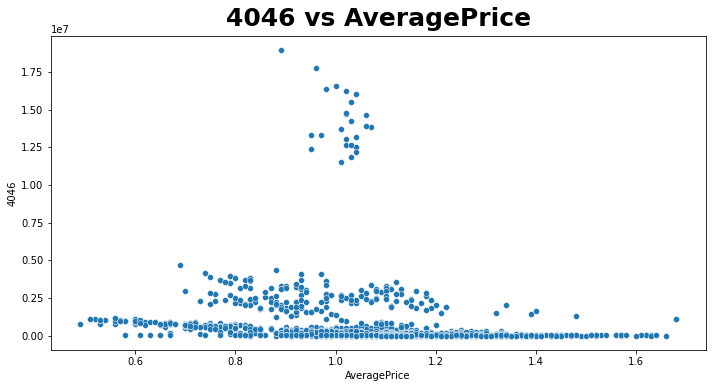

In [136]:
features_plot("4046") # 

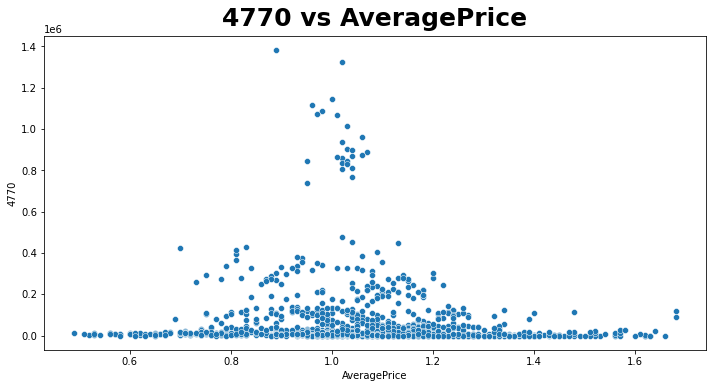

In [137]:
features_plot("4770") #

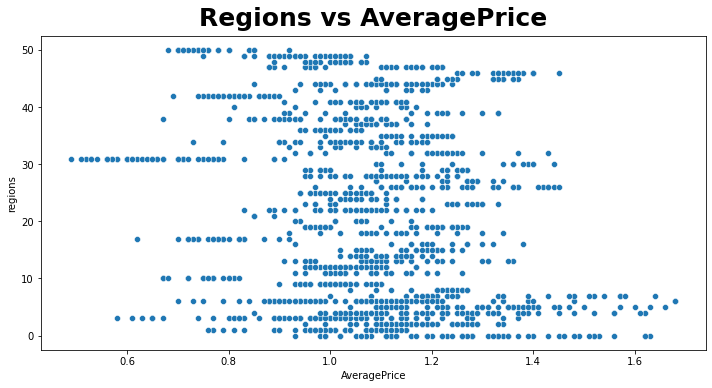

In [138]:
features_plot("regions") #

We can observe from the bivarite analysis that there are outliers from various visualization

# Multivarite Analysis

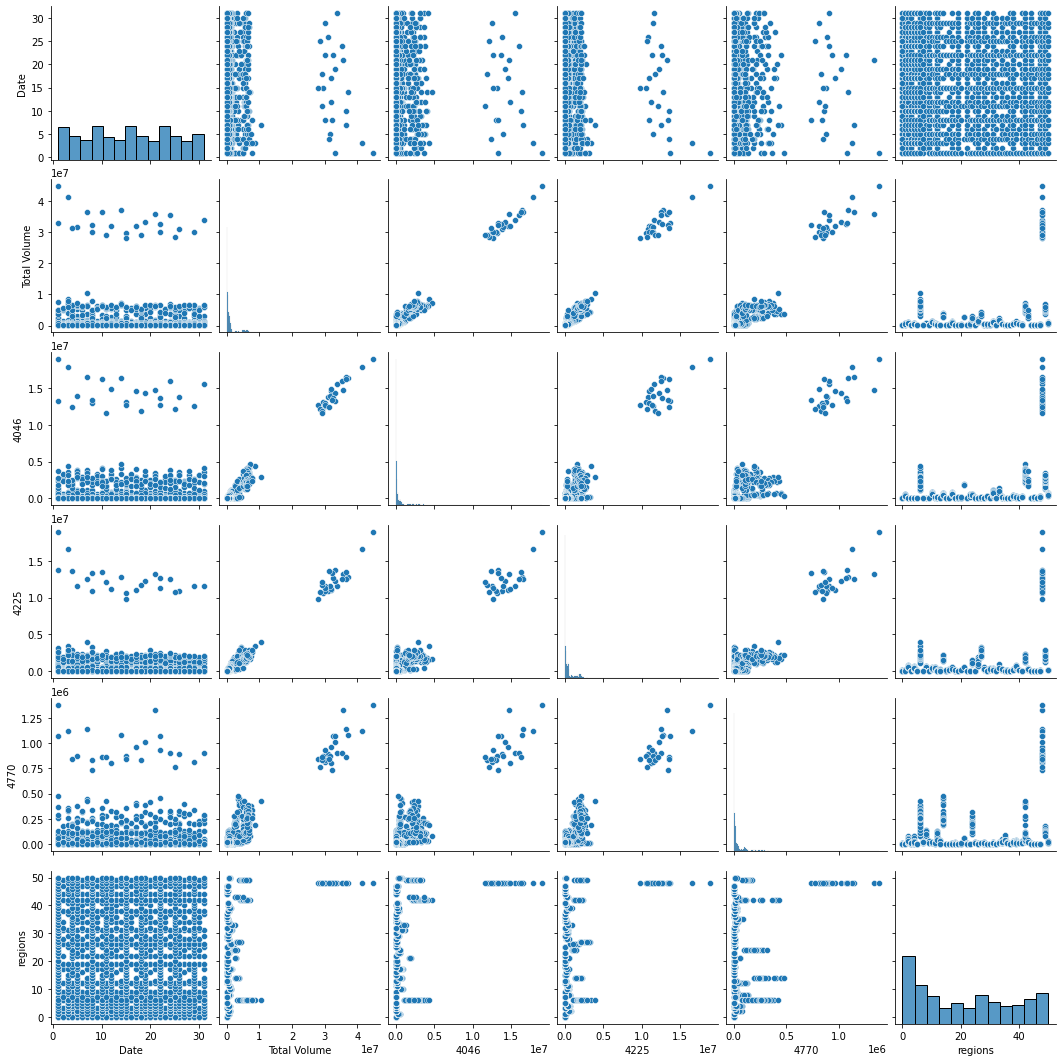

In [139]:
#Pairplot of all numerical variables
sns.pairplot(avocado_dt, vars=['Date','Total Volume','4046','4225','4770','regions'],palette="coolwarm")
plt.show()

# Outliers Removal to avoid Over/underfittings

In [140]:
# Using Z-score to remove outlier
# Checking for skewness of the data
avocado_dt.skew()

Date            0.027740
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Month           0.233418
Year            1.828332
regions         0.288146
dtype: float64

In [141]:
# Total Volume, 4046, 4225,4770, year are skwewd and will be transform to remove their skeweness
from sklearn.preprocessing import power_transform # using power Transformation method

In [142]:
avocado_dt[['Total Volume','4046','4225','4770']]=power_transform(avocado_dt[['Total Volume','4046','4225','4770']],method='yeo-johnson')

In [143]:
# Checking for skewness of the data after transformatio
avocado_dt.skew()

Date            0.027740
AveragePrice   -0.109444
Total Volume    0.071159
4046           -0.012059
4225            0.008450
4770           -0.032945
Month           0.233418
Year            1.828332
regions         0.288146
dtype: float64

In [144]:
Q1 = avocado_dt.quantile(0.25)
Q3 = avocado_dt.quantile(0.75)
IQR = Q3 - Q1

In [145]:
print("Display original dataframe")
print(avocado_dt.shape)
print('/n')
Q1 = avocado_dt.quantile(0.25)
Q3 = avocado_dt.quantile(0.75)
IQR = Q3 - Q1
avocado_dt_out = avocado_dt[~((avocado_dt < (Q1 - 1.5 * IQR)) |(avocado_dt > (Q3 + 1.5 * IQR))).any(axis=1)]
print(avocado_dt_out.shape)

Display original dataframe
(1517, 9)
/n
(1240, 9)


so by using IQR method 217 rows removed and data have 1240 rows and 9 columns

# Data Preprocessing for Classification problem for Task 1

In [146]:
# Separating feature data and Label data
X = avocado_dt_out.drop(['AveragePrice'],axis=1)
y= avocado_dt_out['AveragePrice']

In [147]:
# Standardizing the dataset for X
from sklearn.preprocessing import StandardScaler
stdscalar= StandardScaler()
X_Scalar= stdscalar.fit_transform(X)
#X_Scalar

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_Scalar, y, test_size = 0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((992, 8), (248, 8), (992,), (248,))

# Build/Test multiple models on the same dataset for Task 1

In [149]:
# Linear Regression
lreg=LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

In [150]:
y_pred_lreg= lreg.predict(X_test)
y_pred_lreg.shape

(248,)

In [151]:
#Accuracy and various Metrics for the model
LR_testing=round(lreg.score(X_train, y_train)*100,2)
LR_mae=mean_absolute_error(y_pred_lreg,y_test)
LR_mse=mean_squared_error(y_pred_lreg,y_test)
LR_rmse=np.sqrt(mean_squared_error(y_pred_lreg,y_test))
LR_r2=r2_score(y_test,y_pred_lreg)*100
print('Mean absolute error  =>',LR_mae)
print('Mean squared error  =>',LR_mse)
print('Root Mean squared error  =>',LR_rmse)
print('R2 Score  =>',LR_r2)
print("Accuracy Score of Testing Data is =>",LR_testing)

Mean absolute error  => 0.10109374211725985
Mean squared error  => 0.016009030200158297
Root Mean squared error  => 0.12652679637198713
R2 Score  => 35.25975322718211
Accuracy Score of Testing Data is => 30.52


In [152]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
DT=DecisionTreeRegressor()
DT.fit(X_train,y_train)
y_pred_dt=DT.predict(X_test)
y_pred_dt.shape

(248,)

In [153]:
#Accuracy and various Metrics for the model
DT_testing=round(DT.score(X_train, y_train)*100,2)
DT_mae=mean_absolute_error(y_pred_dt,y_test)
DT_mse=mean_squared_error(y_pred_dt,y_test)
DT_rmse=np.sqrt(mean_squared_error(y_pred_dt,y_test))
DT_r2=r2_score(y_test,y_pred_dt)*100
print('Mean absolute error  =>',DT_mae)
print('Mean squared error  =>',DT_mse)
print('Root Mean squared error  =>',DT_rmse)
print('R2 Score  =>',DT_r2)
print("Accuracy Score of Testing Data is =>",DT_testing)

Mean absolute error  => 0.06193548387096773
Mean squared error  => 0.007578225806451611
Root Mean squared error  => 0.08705300572899026
R2 Score  => 69.35378329132249
Accuracy Score of Testing Data is => 100.0


In [154]:
# Support Vector Machine
from sklearn.svm import SVR
svm=SVR(kernel='rbf')
svm.fit(X_train,y_train)
#Predicting the test set result
y_pred_svm=svm.predict(X_test)
y_pred_svm.shape

(248,)

In [155]:
#Accuracy and various Metrics for the model
svm_testing=round(svm.score(X_train, y_train)*100,2)
svm_mae=mean_absolute_error(y_pred_svm,y_test)
svm_mse=mean_squared_error(y_pred_svm,y_test)
svm_rmse=np.sqrt(mean_squared_error(y_pred_svm,y_test))
svm_r2=r2_score(y_test,y_pred_svm)*100
print('Mean absolute error  =>',svm_mae)
print('Mean squared error  =>',svm_mse)
print('Root Mean squared error  =>',svm_rmse)
print('R2 Score  =>',svm_r2)
print("Accuracy Score of Testing Data is =>",svm_testing)

Mean absolute error  => 0.07250941714771106
Mean squared error  => 0.007794097090582636
Root Mean squared error  => 0.08828418369437777
R2 Score  => 68.4808034773629
Accuracy Score of Testing Data is => 73.96


In [156]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor() #
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
clf_pred.shape

(248,)

In [157]:
#Accuracy and various Metrics for the model
clf_testing=round(clf.score(X_train, y_train)*100,2)
clf_mae=mean_absolute_error(clf_pred,y_test)
clf_mse=mean_squared_error(clf_pred,y_test)
clf_rmse=np.sqrt(mean_squared_error(clf_pred,y_test))
clf_r2=r2_score(y_test,clf_pred)*100
print('Mean absolute error  =>',clf_mae)
print('Mean squared error  =>',clf_mse)
print('Root Mean squared error  =>',clf_rmse)
print('R2 Score  =>',clf_r2)
print("Accuracy Score of Testing Data is =>",clf_testing)

Mean absolute error  => 0.048591129032258026
Mean squared error  => 0.0039911182258064405
Root Mean squared error  => 0.06317529759175211
R2 Score  => 83.8599855451803
Accuracy Score of Testing Data is => 97.32


In [158]:
# Extra Tree Classifier
from sklearn.ensemble import GradientBoostingRegressor
xgbreg = XGBRegressor(random_state = 0)
# Fit the model
xgbreg.fit(X_train, y_train)
et_xgb = xgbreg.predict(X_test)
et_xgb.shape

(248,)

In [159]:
#Accuracy and various Metrics for the model
et_testing=round(xgbreg.score(X_train, y_train)*100,2)
et_mae=mean_absolute_error(et_xgb,y_test)
et_mse=mean_squared_error(et_xgb,y_test)
et_rmse=np.sqrt(mean_squared_error(et_xgb,y_test))
et_r2=r2_score(y_test,et_xgb)*100
print('Mean absolute error  =>',et_mae)
print('Mean squared error  =>',et_mse)
print('Root Mean squared error  =>',et_rmse)
print('R2 Score  =>',et_r2)
print("Accuracy Score of Testing Data is =>",et_testing)

Mean absolute error  => 0.04326295132598569
Mean squared error  => 0.0035178415077890277
Root Mean squared error  => 0.059311394417843756
R2 Score  => 85.77390857069709
Accuracy Score of Testing Data is => 99.88


# Cross Validation of all the models on the same dataset for Task 1

In [160]:
k_folds = KFold(n_splits = 10)

In [161]:
LR_scores = cross_val_score(lreg, X_Scalar, y, cv = k_folds)
dt_scores = cross_val_score(DT, X_Scalar, y, cv = k_folds)
svm_scores = cross_val_score(svm, X_Scalar, y, cv = k_folds)
clf_scores = cross_val_score(clf, X_Scalar, y, cv = k_folds)
#xgbreg_scores= cross_val_score(xgbreg, X_Scalar, y, cv = k_folds)
et_scores= cross_val_score(xgbreg, X_Scalar, y, cv = k_folds)
#print("Cross Validation Scores: ", scores)
print("Average CV Score for Linear Regression is : ", LR_scores.mean()*100)
print('\n')
print("Average CV Score for Decsion Tree Regressor : ", dt_scores.mean()*100)
print('\n')
print("Average CV Score for Support Vector Machine is : ", svm_scores.mean()*100)
print('\n')
print("Average CV Score for Random Forest Regressor  is : ", clf_scores.mean()*100)
print('\n')
print("Average CV Score for Gradient Boosting Classifier is : ", et_scores.mean()*100)


Average CV Score for Linear Regression is :  -7.403659098976699


Average CV Score for Decsion Tree Regressor :  -41.214779710516225


Average CV Score for Support Vector Machine is :  3.913768876513214


Average CV Score for Random Forest Regressor  is :  6.609993049405663


Average CV Score for Gradient Boosting Classifier is :  -7.829303595136617


In [162]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, X,y):
    rmse =- (cross_val_score(model, X,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
          DecisionTreeRegressor(),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         XGBRegressor(random_state = 0),]
          
          
names = ['LR', 'DT', 'svm','RF','xgbreg']
          
for model,name in zip(models,names):
          score = rmse_cv(model,X,y)
          print("{}  : {:.4f}, {:4f}".format(name,score.mean()*100,score.std()*100))

LR  : 1.9825, 0.532696
DT  : 2.2744, 0.429517
svm  : 2.5180, 0.975115
RF  : 1.6234, 0.532518
xgbreg  : 1.8670, 0.460017


# Hyperparameter tuning for Random Foresr Regressor for Task 1

In [163]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [164]:
grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
print('Best score:', grid_search.best_score_) #grid.cv_scores_
print('Best params:', grid_search.best_params_)

RandomForestRegressor(max_depth=6, max_features=None, max_leaf_nodes=9,
                      n_estimators=150)
Best score: 0.5727761762481249
Best params: {'max_depth': 6, 'max_features': None, 'max_leaf_nodes': 9, 'n_estimators': 150}


In [165]:
y_pred_grid=grid_search.best_estimator_.predict(X_test) # With best parameter
y_pred_grid

array([1.05706484, 1.10029116, 1.14343607, 1.07387229, 1.1145878 ,
       1.15572924, 1.16406446, 1.16777272, 1.0789055 , 1.07064654,
       1.07643008, 0.78450657, 1.05916547, 1.07643008, 1.1442001 ,
       1.13769947, 1.07176136, 0.79171856, 1.16780359, 1.07593491,
       1.15326158, 1.12451687, 0.93856128, 1.16918864, 1.1634698 ,
       1.05153257, 1.13760011, 1.03877405, 1.14081481, 1.0732477 ,
       1.0026861 , 1.19202067, 1.07539454, 1.1176062 , 1.19062376,
       0.78450657, 1.17223777, 1.11675881, 1.12729855, 1.07477147,
       1.07296548, 1.07551408, 1.12451687, 0.78450657, 1.08139483,
       1.1520323 , 1.04080292, 0.98585184, 1.05051258, 1.1365971 ,
       1.05728992, 1.0026861 , 1.1273432 , 1.15787729, 1.11101326,
       1.16886089, 1.15018702, 1.13105485, 1.1054291 , 0.96560792,
       1.0773195 , 1.27756651, 1.16206373, 0.78450657, 1.16346885,
       1.16886089, 1.07846088, 1.12160828, 1.17019641, 1.13067571,
       0.93537216, 1.13201542, 1.13658784, 1.07643008, 0.78951

In [166]:
print('MSE:',mean_squared_error(y_pred_grid,y_test))
print('MAE:',mean_absolute_error(y_pred_grid,y_test))
print('r2_score:',r2_score(y_pred_grid,y_test)*100)

MSE: 0.009208556764193757
MAE: 0.07629842367707662
r2_score: 30.9165043021546


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

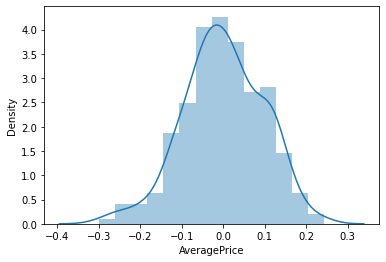

In [167]:
sns.distplot(y_pred_grid-y_test)

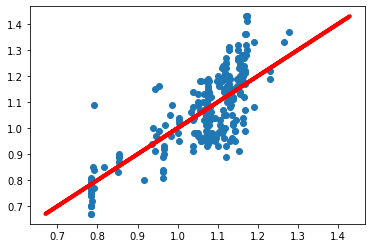

In [168]:
plt.scatter(y_pred_grid,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

# Saving the best Model for Task 1

In [169]:
joblib.dump(grid_search.best_estimator_,'Avocado Average Price Prediction_Project.obj')

['Avocado Average Price Prediction_Project.obj']

,Y Test,Pred
415,1.07,1.057065
259,0.93,1.100291
332,0.99,1.143436
623,1.07,1.073872
101,0.99,1.114588


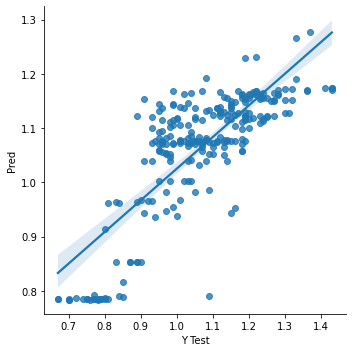

In [170]:
# Comparing the Actual price and predicted price
cmp_data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_grid},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=cmp_data,palette='rainbow')
cmp_data.head()

# Task 2 : Predicting the Region for the Avocado 

# Data Preprocessing for Classification problem for Task 2

In [171]:
# Separating feature data and Label data
X_r = avocado_dt_out.drop(['regions'],axis=1)
y_r= avocado_dt_out['regions']
y

0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
1265    0.71
1266    0.80
1267    0.80
1268    0.92
1269    0.75
Name: AveragePrice, Length: 1240, dtype: float64

In [172]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_r, y_r, test_size = 0.20,random_state=42)
Xr_train.shape,Xr_test.shape,yr_train.shape,yr_test.shape

((992, 8), (248, 8), (992,), (248,))

In [173]:
# Linear Regression
lreg=LinearRegression()
lreg.fit(Xr_train,yr_train)
y_pred_lreg= lreg.predict(Xr_test)
y_pred_lreg.shape

(248,)

In [174]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(yr_test,y_pred_lreg))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(yr_test,y_pred_lreg))
print('\n')
print('R2 Score: %.2f' % r2_score(yr_test,y_pred_lreg))
print('\n')

Mean squared error: 206.0


Mean absolute error: 12.33


R2 Score: 0.15




In [175]:
# Decision Tree
DT=tree.DecisionTreeClassifier()
DT.fit(Xr_train,yr_train)
y_pred_dt=DT.predict(Xr_test)
y_pred_dt.shape

(248,)

In [176]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(yr_test,y_pred_dt))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(yr_test,y_pred_dt))
print('\n')
print('R2 Score: %.2f' % r2_score(yr_test,y_pred_dt))
print('\n')

Mean squared error: 65.3


Mean absolute error: 2.43


R2 Score: 0.73




In [177]:
# Support Vector Machine
svmModel=SVC(kernel='rbf',random_state=1)
svmModel.fit(Xr_train,yr_train)
#Predicting the test set result
y_pred_svm=svmModel.predict(Xr_test)
y_pred_svm.shape

(248,)

In [178]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(yr_test,y_pred_svm))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(yr_test,y_pred_svm))
print('\n')
print('R2 Score: %.2f' % r2_score(yr_test,y_pred_svm))
print('\n')

Mean squared error: 815.9


Mean absolute error: 23.94


R2 Score: -2.36




In [179]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth = 50 ,max_features = 3, bootstrap = True, random_state = 18) #
clf.fit(Xr_train, yr_train)
clf_pred = clf.predict(Xr_test)
clf_pred.shape

(248,)

In [180]:
# Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(yr_test,clf_pred))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(yr_test,clf_pred))
print('\n')
print('R2 Score: %.2f' % r2_score(yr_test,clf_pred))
print('\n')

Mean squared error: 45.6


Mean absolute error: 1.48


R2 Score: 0.81




In [181]:
# Using Gradient Boosting Classifier
xgbreg = XGBRegressor(random_state = 0)
# Fit the model
xgbreg.fit(Xr_train, yr_train)
et_xgb = xgbreg.predict(Xr_test)
et_xgb.shape

(248,)

In [182]:
#Model Accuracy
print("Mean squared error: %.1f" % mean_squared_error(yr_test,et_xgb))
print('\n')
print("Mean absolute error: %.2f" % mean_absolute_error(yr_test,et_xgb))
print('\n')
print('R2 Score: %.2f' % r2_score(yr_test,et_xgb))
print('\n')

Mean squared error: 38.3


Mean absolute error: 3.93


R2 Score: 0.84




In [183]:
# Cross validation for Task 2
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, X_r,y_r, scoring='neg_mean_squared_error', cv=5))
    return(rmse)


models = [LinearRegression(),
          SVC(kernel='linear'),
         RandomForestClassifier(n_estimators=100, random_state=42),
         tree.DecisionTreeClassifier(random_state=42),
         XGBRegressor(random_state = 0),
         ]
          
          
names = ['LR', 'svr', 'RF','DT','xgbreg']
          
for model,name in zip(models,names):
          score = rmse_cv(model,X_r,y_r)
          print("{}  : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR  : 365.676002, 201.325317
svr  : 135.009677, 117.556644
RF  : 61.929032, 20.036374
DT  : 107.712903, 36.969946
xgbreg  : 556.821195, 376.677352


# Hyperparameter tuning for Random Foresr Classifier for Task 2 as the best model out of other models

In [184]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [185]:
grid_search = GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
grid_search.fit(Xr_train, yr_train)
print(grid_search.best_estimator_)
print('Best score:', grid_search.best_score_*100) #grid.cv_scores_
print('Best params:', grid_search.best_params_)

RandomForestClassifier(max_depth=6, max_leaf_nodes=9, n_estimators=150)
Best score: 58.564539871072526
Best params: {'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'n_estimators': 150}


In [186]:
# Using the best parameter
yr_pred_grid=grid_search.best_estimator_.predict(Xr_test) # With best parameter
yr_pred_grid

array([14,  9, 38,  9,  2, 44,  0,  2,  1,  9,  9, 17,  1,  9,  2, 44,  9,
       50,  0,  9, 22,  9,  1, 26,  2, 49, 22, 38, 28,  9, 48,  9,  9, 12,
        9, 17,  1,  3, 44, 38, 19, 38, 28, 17,  1, 28,  9, 38, 49, 22, 24,
       48, 22, 28,  2,  0,  2, 44, 44, 49, 38,  0, 28, 17, 26,  0,  1, 44,
       26, 38, 38,  0, 47,  9, 50, 50, 44, 38, 38, 17,  9, 19,  9, 26, 47,
       38,  9, 48, 28,  9, 26, 50, 19, 12,  1, 38,  0, 38,  9,  1,  1,  9,
        0, 26,  9,  1, 13, 44, 12, 38,  2, 38, 26,  9, 38, 28, 24, 17,  0,
       28, 26,  9, 19, 50, 49,  9, 38, 49,  1,  2, 17,  1,  2, 26, 38, 48,
        9, 28, 46, 38, 26, 24, 12, 47,  9, 44, 38, 44, 47, 28, 38, 38, 19,
       38, 28, 38, 19, 38,  2, 17, 19,  9, 44, 12, 47, 47, 49, 42,  9,  0,
        3,  9,  9, 42, 24, 19,  1, 38, 50, 12, 28, 17, 19, 12, 42, 38, 12,
        3, 44, 12, 17, 44, 12, 42, 28,  3, 17, 49, 12, 26, 44,  9, 44,  1,
       12,  1,  9, 17, 26, 49, 49,  1, 22, 28, 49, 42,  3, 50, 12,  1,  9,
       49, 14, 42, 50, 38

In [187]:
print('MSE:',mean_squared_error(yr_pred_grid,yr_test))
print('MAE:',mean_absolute_error(yr_pred_grid,yr_test))
print('r2_score:',r2_score(yr_pred_grid,yr_test)*100)

MSE: 229.88709677419354
MAE: 8.766129032258064
r2_score: 19.32615227030595


<AxesSubplot:xlabel='regions', ylabel='Density'>

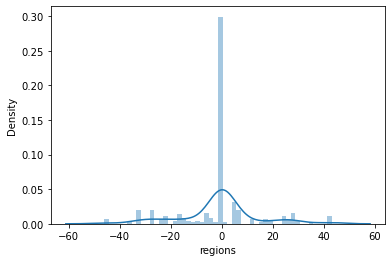

In [188]:
sns.distplot(yr_pred_grid-yr_test)

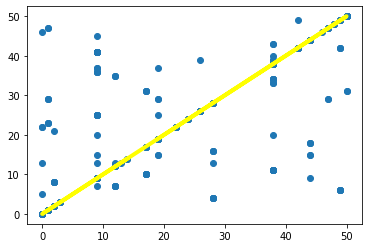

In [189]:
plt.scatter(yr_pred_grid,yr_test)
plt.plot(yr_test,yr_test,linewidth=4,color='Yellow')

# Saving the best Model for Task 2

In [190]:
joblib.dump(grid_search.best_estimator_,'Avocado Regional Sales Prediction_Project.obj')

['Avocado Regional Sales Prediction_Project.obj']

,Y Test,Pred
415,14,14
259,9,9
332,11,38
623,25,9
101,2,2


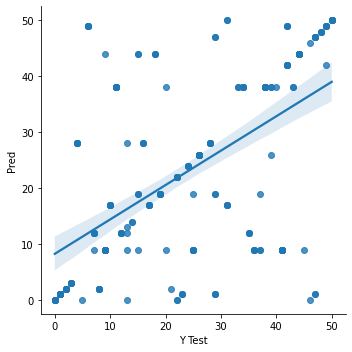

In [191]:
# Comparing the Actual price and predicted price
cmpr_data = pd.DataFrame({'Y Test':yr_test , 'Pred':yr_pred_grid},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=cmpr_data,palette='rainbow')
cmpr_data.head()

Project Outcome and Conclusion
The Exploratory Data and predictive analysis provided valuable insights into the factors that positively to the average price of avaocado, values such as 4046,4225 etc
We can deduce from the visualization that there are outliers in the dataset which are removed by skewness and IQR method
We also perfomed EDA to remove null values in the dataset.
We can see that maximum values of Avocado was sold in Year 2015 ee maximum avocado are sold in month 3,4 and 5 months on average sale

After performing all neccesary data preprocessing and employed model such as linearRegression, Decsion Tree Regressor,Support Vector Machine,Random Forest Regressor and Gradient Boosting classifier to train and test the dataset,andomForestRegressor overperfomed others with a better RMSE
Random Forest regressor was hypertuned using Gridsearch technique and the one with the best optimal perfomacnce was choosen to predict the avocado average prrice.